# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read dataset
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [4]:
#All columns in dataset
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [5]:
#Info of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [6]:
#Checking for null values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
#Filling null values
df['Description'].fillna(df['Description'].mode()[0] , inplace=True)
df['CustomerID'].fillna(df['CustomerID'].median() , inplace=True)

In [8]:
#Statistical Analysis
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114   15253.867397
std       218.081158      96.759853    1485.905852
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   14367.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16255.000000
max     80995.000000   38970.000000   18287.000000


In [9]:
#Checking for duplicates
print(f'Duplicate Rows: {df.duplicated().sum()}')

Duplicate Rows: 5268


In [10]:
#Removing Duplicates
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [12]:
#Change Data type of InvoiceDate to Date and time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].head())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


# Sales Trend over Time


Month
2010-12     746723.610
2011-01     558448.560
2011-02     497026.410
2011-03     682013.980
2011-04     492367.841
2011-05     722094.100
2011-06     689977.230
2011-07     680156.991
2011-08     681386.460
2011-09    1017596.682
2011-10    1069368.230
2011-11    1456145.800
2011-12     432701.060
Freq: M, Name: Total_Amount, dtype: float64


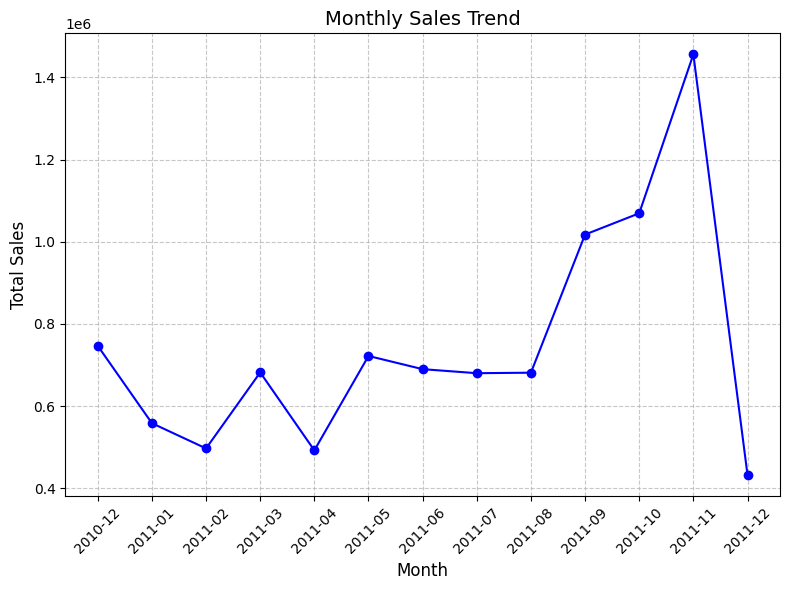

In [15]:
#Monthly Sale Trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']
Monthly_Sale = df.groupby('Month')['Total_Amount'].sum()
print(Monthly_Sale)
#Plot
plt.figure(figsize=(8,6))
plt.plot(Monthly_Sale.index.astype(str) , Monthly_Sale.values , marker='o' , color='blue')
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histrogram of Customer Sales

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2045.53
18287.0    1837.28
Name: Total_Amount, Length: 4372, dtype: float64


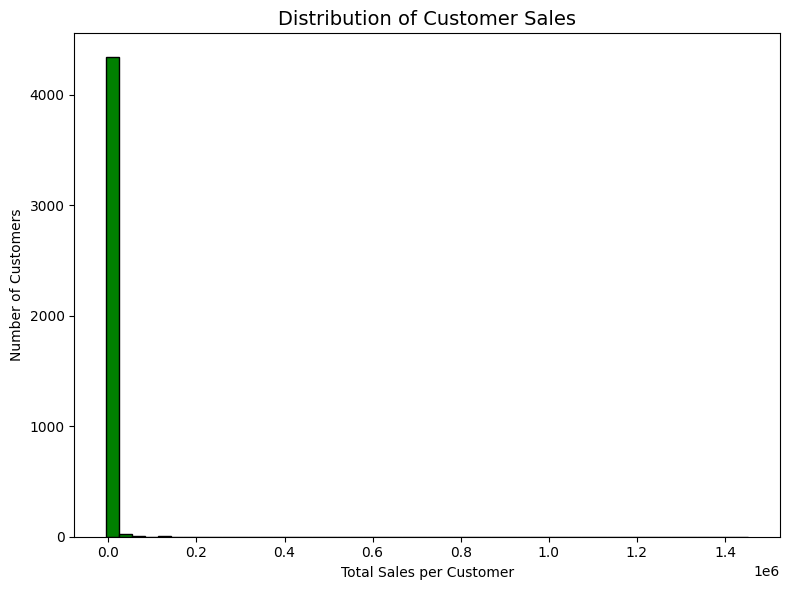

In [14]:
#Customer Sales
Customer_Sale = df.groupby('CustomerID')['Total_Amount'].sum()
print(Customer_Sale)

plt.figure(figsize=(8,6))
plt.hist(Customer_Sale, bins=50, color='green', edgecolor='black')

plt.title("Distribution of Customer Sales", fontsize=14)
plt.xlabel("Total Sales per Customer")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
